<a href="https://colab.research.google.com/github/twilight2001/GEC-T5/blob/master/t5small_gec_errant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Based on Huggingface t5small unbabel fine tuned by 2.4M records cLang8 datatset for GEC
# 65-70% accuracy on BEA2019 shared task benchmark (Cambrige), 70% (top) in CONLL2014 share task (Singapore ELBS)

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("Mapping Colab to gdrive")
  # Mount the Google Drive at mount
  mount='/content/gdrive'
  drive.mount(mount)
  # Switch to the directory on the Google Drive that you want to use
  import os
  drive_root = mount + "/MyDrive/Colab_Notebooks/HF_t5small_unbabel/"

  # Create drive_root if it doesn't exist
  create_drive_root = True
  if create_drive_root:
    print("\nColab: Drive", drive_root, " exists.")
    os.makedirs(drive_root, exist_ok=True)

  # Change to the directory
  %cd $drive_root

Mounted at /content/drive
Mapping Colab to gdrive
Mounted at /content/gdrive

Colab: Drive /content/gdrive/MyDrive/Colab_Notebooks/HF_t5small_unbabel/  exists.
/content/gdrive/MyDrive/Colab_Notebooks/HF_t5small_unbabel


In [ ]:
!pwd

/content


In [3]:
!git clone https://github.com/huggingface/transformers.git
!pip install ./transformers
!pip install -U nlp
!pip install datasets transformers[sentencepiece]
!pip install sentencepiece
!pip install transformers datasets
!pip install torch

fatal: destination path 'transformers' already exists and is not an empty directory.
Processing ./transformers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.2 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.31.0.dev0-py3-none-any.whl size=7265129 sha256=89f2130f9287b897d4eb29a701287aa1a311d12fa0ecdf209f66b5a2885829b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-gny0nl0i/wheels/0a/ba/86/39d15cbe99f7659092f905ecbfbadc2dd50354b584b0d07865
Successfully built transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [4]:
# mini-test to make sure transformer is working first after installation
import torch
import sentencepiece
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Model and tokenizer
model_name = "Unbabel/gec-t5_small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

sentence = "I like to swimming"
# Tokenize and prepare input
tokenized_sentence = tokenizer('gec: ' + sentence, max_length=256, truncation=True, padding='max_length', return_tensors='pt')
# Generate corrected sentence
generated_output = model.generate(
    input_ids=tokenized_sentence.input_ids,
    attention_mask=tokenized_sentence.attention_mask,
    max_length=128,
    num_beams=5,
    early_stopping=True,
)

# Decode and clean up the generated output
corrected_sentence = tokenizer.decode(
    generated_output[0],
    skip_special_tokens=True,
    clean_up_tokenization_spaces=True
)

# Print the corrected sentence
print("Original Sentence:", sentence)
print("Corrected Sentence:", corrected_sentence)

Original Sentence: I like to swimming
Corrected Sentence: I like swimming.


In [5]:
# protobuf~=3.19.0
# spacy==2.3.0
# errant==2.2.0
# sentencepiece
# transformers

!pip install srsly==1.0.5
!pip install spacy==2.3.9
!pip install errant==2.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.3/86.3 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for srsly: filename=srsly-1.0.5-cp310-cp310-linux_x86_64.whl size=558614 sha256=ba504bbbfef5dfb2a3b8e47c3c85065868081d9a9abcfb1d147a4c391de70ae2
  Stored in directory: /root/.cache/pip/wheels/6c/d4/c1/459f2fe59bfecd479ac8149afb766940421b6504fad684743b
Successfully built srsly
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.6
    Uninstalling srsly-2.4.6:
      Successfully uninstalled srsly-2.4.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
confection 0.0.4 requires srsly<3.0.0,>=2.4.0, but you have srsly 1.0.5 which is incompatible.
spacy 3.5.3 requires srsly<3.0.

In [ ]:
#!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy link en_core_web_sm en

In [7]:
import sys
import errant
import spacy
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM

In [8]:
# Load the English language model for spaCy
nlp = spacy.load('en')

In [9]:
# Improved readability, use dual value error dictionary
# Output sequence:  value1 + operation + value2 (if not null)
# Change Morphology=Word form, Orinthography=Common Usage

operation_descriptions_table = {
    "M": "missing",
    "U": "unnecessary",
    "R": "replaced"
}

error_descriptions_table = {
    "ADJ": ("Adjective", None),
    "ADJ:FORM": ("Adjective", "Form"),
    "ADV": ("Adverb", None),
    "CONJ": ("Conjunction", None),
    "CONTR": ("Spacing", "Avoid Contraction"),
    "DET": ("Determiner", None),
    "MORPH": ("Word", "Form"),
    "NOUN": ("Noun", None),
    "NOUN:INFL": ("Noun", "Inflection"),
    "NOUN:NUM": ("Noun", "Number"),
    "NOUN:POSS": ("Noun", "Possessive"),
    "ORTH": ("Space", "Extra Spacing"),
    "OTHER": ("Other", None),
    "PART": ("Particle", None),
    "PREP": ("Preposition", None),
    "PRON": ("Pronoun", None),
    "PUNCT": ("Punctuation", None),
    "SPELL": ("Word", "Wrong Spelling"),
    "UNK": ("Unknown", None),
    "VERB": ("Verb", None),
    "VERB:FORM": ("Verb", "Form"),
    "VERB:INFL": ("Verb", "Inflection"),
    "VERB:SVA": ("Verb", "Subject-Verb Agreement"),
    "VERB:TENSE": ("Verb", "Tense"),
    "WO": ("Word", "Order"),
}

In [ ]:
def get_error_descriptions(error_string, operation_descriptions_table, error_descriptions_table):
    error_codes = error_string.split()
    error_desc = []
    sorted_keys = sorted(error_descriptions_table.keys(), key=lambda x: len(x), reverse=True)
    for code in error_codes:
        operation, *parts = code.split(':')
        max_match = ''
        for c in sorted_keys:
            if ':'.join(parts).startswith(c) and len(c) > len(max_match):
                max_match = c
        if max_match:
            value1, value2 = error_descriptions_table[max_match]
            if value2 is None:
                description = value1 + ' ' + operation_descriptions_table[operation]
            else:
                description = value1 + ' ' + operation_descriptions_table[operation] + ', ' + value2
            error_desc.append(description)
    return error_desc


In [10]:
def get_error_descriptions(error_string, operation_descriptions_table, error_descriptions_table):
    error_codes = error_string.split()
    error_desc = []
    sorted_keys = sorted(error_descriptions_table.keys(), key=lambda x: len(x), reverse=True)
    for code in error_codes:
        operation, *parts = code.split(':')
        max_match = ''
        for c in sorted_keys:
            if ':'.join(parts).startswith(c) and len(c) > len(max_match):
                max_match = c
        if max_match:
            value1, value2 = error_descriptions_table[max_match]
            if value2 is None:
                description = value1 + ' ' + operation_descriptions_table[operation]
            else:
                description = value2 + ', ' + value1 + ' ' + operation_descriptions_table[operation]
            error_desc.append(description)
    return error_desc

In [11]:
sentences = [
    "He are moving here.",
    "I am doing fine. How is you?",
    "How is they?",
    "Matt like fish",
    "the collection of letters was original used by the ancient Romans",
    "We enjoys horror movies",
    "Anna and Mike is going skiing",
    "I walk to the store and I bought milk",
    " We all eat the fish and then made dessert",
    "I will eat fish for dinner and drink milk",
    "what be the reason for everyone leave the company",
    "He has an elder sister , who has just finished her IT degree and now she is looking for a job .",
    "His mother teaches biology science for advanced level students in Ananda College - Colombo 10 and father works in Peoples ' Bank as an assistant manager .",
    "he 's a cool , charming and very sociable person .",
    "He 's also sensitive .",
    "When someone face a trouble , he does n't look at others and he go forward to help them as much as he can .",
    "Not only that he 's a responsible and reliable guy .",
    "Sometimes he borrows my personal things(laptop , pen drives ) and gives me back on time as it is .",
    "He 's incredibly hard working.that's the secret behind his exams results .",
    "He likes going out with friends , watching movies and listening to music - using his hi - fi headset , so do n't worry about noise!",
    "He 's a good rugby player and he plays for his university team.he's crazy about computer games .",
    "He had already finished many famous computer games when we left school , but he knows the limit and knows how to manage with studies without any disturbance .",
    "He 's keen on sports cars .",
    "He has a large collection of pictures and videos about sports cars .",
    "Also he has a quite good knowledge about automobiles .",
    "I know most of the time he does some repairs himself .",
    "So it may be helpful for you during his holiday .",
    "The only negative things I can think of are he 's a bit untidy and not well organised ."
    "So in art research exist in artwork itself .",
    "I have read in the book about artistic research that artist are doing their research without calling it research .",
    "Mrs Kate Ashby ,",
    "I would like to apply for a weekend job in Green Pepper Cafe .",
    "I am twentyone year old student .",
    "Food is the most important part of my life , it makes me happy .",
    "I really like to cook for my friends , different kinds of dishes from all over a word .",
    "I am used to working long hours , because last holidays I had full - time job in a bar at the beach .",
    "I am open - minded and full of smile person who loves to meet new people and learn new things .",
    "I think that I am calm and friendly person , for me satisfied client is a happy client .",
    "I also know Spanish , it could be helpful to talk with tourists from Spain .",
    "I hope you would like to meet with me and get to know more about my expiriencr in working in bars and cafes .",
    "I am looking foroward to hearing from you .",
    "With kind regards Clarita",
    "Watching \" Cuéntame \" might not be the first film you think of about the Spanish last century , but in fact there is a good example of our country 's history at that time .",
    "Although , it was shot last year by a young director , he has known how difficult the life was , so it is more than likely he studied in detail society , customs , clothes or hair trended because eldest say it is a thrush reflection of the Spaniards life .",
    "Even more , it said by pensioners that the movie makes them remind their young ages- so it is a realistic film .",
    "On the other hand , it is more than likely that they could be a bit sad , homesick , and maybe they could lost a tear too .",
    "The movie would reflect the life in an average family with a toddler and two teenagers children and the grandmother , who ever is wearing black clothes because she lost her husband in the Spanish Civil War .",
    "As the parents are working out she used to do the housework , taking care of her grandchildren 's .",
    "On top of that , it is watching the beginning of the democracy age and how hard was the birth of some polity parties and , of course , it is showing us how women begging to smoke , wearing skinny trousers or getting the driving license .",
    "it was a strange change in this country .",
    "To sum up , I strongly recommend this movie , not only for students or young people but also for middle ages and eldest In addition , it could be a great movie for foreign people so they could be able to understand easily our History .",
    "Dear Mrs Ashby ,",
    "I would like to work in the cafe at the weekend .",
    "I have worked cafe many times before and enjoy meeting people . I have used Green Pepper Cafe many times and drink coffee there .",
    "It was very good and people working there are happy .",
    "I want to work your place as I am interested in many foods and I really enjoy meeting with people .",
    "I also work long hours in a cafe before which I like .",
    "Please tell me soon if I have interview .",
    "Schooling of the children 's",
    "I think children 's must be educated at school , not at home .",
    "Because at school they can deal with other people , learning since young how to deal with the situations , with other thoughts and cultures , and learn with that stuff .",
    "Knowledge it 's not just what we learn sit on a chair , but how to deal with society too ."
]

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import errant
from collections import Counter

# Model and tokenizer
model_name = "Unbabel/gec-t5_small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Load ERRANT annotator
annotator = errant.load('en')

# Initialize list to store error codes
error_codes = []

for influent_sentence in sentences:
    orig = annotator.parse(influent_sentence)

    # Tokenize and prepare input
    tokenized_sentence = tokenizer('gec: ' + influent_sentence, max_length=150, truncation=True, padding='max_length', return_tensors='pt')

    # Generate corrected sentence
    generated_output = model.generate(
        input_ids=tokenized_sentence.input_ids,
        attention_mask=tokenized_sentence.attention_mask,
        max_length=150,
        num_beams=5,
        early_stopping=True,
    )

    # Decode and clean up the generated output
    corrected_sentence = tokenizer.decode(
        generated_output[0],
        skip_special_tokens=True,
        clean_up_tokenization_spaces=True
    )

    # Print the input and corrected sentences
    print("[Input] ", influent_sentence)
    print("[Correction] ", corrected_sentence)

    # If the original sentence is the same as the corrected sentence, print "Sentence is correct" and skip the error analysis
    if influent_sentence.strip() == corrected_sentence.strip():
        print("Sentence is correct.")
        print("-" * 100)
        continue

    cor = annotator.parse(corrected_sentence)
    edits = annotator.annotate(orig, cor)

    for e in edits:
        error_desc = get_error_descriptions(e.type, operation_descriptions_table, error_descriptions_table)
        print(e.o_start, e.o_end, e.o_str, e.c_start, e.c_end, e.c_str, error_desc, e.type)
        break  # Break after the first edit

    print("-" * 100)

[Input]  He are moving here.
[Correction]  He is moving here.
1 2 are 1 2 is ['Subject-Verb Agreement, Verb replaced'] R:VERB:SVA
----------------------------------------------------------------------------------------------------
[Input]  I am doing fine. How is you?
[Correction]  I am doing fine. How are you?
5 6 is 5 6 are ['Subject-Verb Agreement, Verb replaced'] R:VERB:SVA
----------------------------------------------------------------------------------------------------
[Input]  How is they?
[Correction]  How are they?
1 2 is 1 2 are ['Subject-Verb Agreement, Verb replaced'] R:VERB:SVA
----------------------------------------------------------------------------------------------------
[Input]  Matt like fish
[Correction]  Matt likes fish.
1 2 like 1 2 likes ['Wrong Spelling, Word replaced'] R:SPELL
----------------------------------------------------------------------------------------------------
[Input]  the collection of letters was original used by the ancient Romans
[Correc

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import errant
from collections import Counter

# Model and tokenizer
model_name = "Unbabel/gec-t5_small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Load ERRANT annotator
annotator = errant.load('en')

# Initialize counters
total_sentences = 0
correct_sentences = 0
error_counter = Counter()

for influent_sentence in sentences:
    total_sentences += 1
    orig = annotator.parse(influent_sentence)

    # Tokenize and prepare input
    tokenized_sentence = tokenizer('gec: ' + influent_sentence, max_length=150, truncation=True, padding='max_length', return_tensors='pt')

    # Generate corrected sentence
    generated_output = model.generate(
        input_ids=tokenized_sentence.input_ids,
        attention_mask=tokenized_sentence.attention_mask,
        max_length=150,
        num_beams=5,
        early_stopping=True,
    )

    # Decode and clean up the generated output
    corrected_sentence = tokenizer.decode(
        generated_output[0],
        skip_special_tokens=True,
        clean_up_tokenization_spaces=True
    )

    # Print the input sentence
    print("[Input] ", influent_sentence)

    # Only print the corrected sentence if it's different from the original
    if corrected_sentence != influent_sentence:
        print("[Correction] ", corrected_sentence)

        cor = annotator.parse(corrected_sentence)
        edits = annotator.annotate(orig, cor)

        for e in edits:
            error_desc = get_error_descriptions(e.type, operation_descriptions_table, error_descriptions_table)
            print(e.o_start, e.o_end, e.o_str, e.c_start, e.c_end, e.c_str, error_desc, e.type)
            error_counter[error_desc[0]] += 1
            break  # Break after the first edit
    else:
        print("Sentence is correct.")
        correct_sentences += 1

    print("-" * 100)

# Print statistics
print(f"Total sentences: {total_sentences}")
print(f"Correct sentences: {correct_sentences}")
print("Top 5 errors:")
top_5_errors = []
for error, count in error_counter.most_common(5):
    print(f"{error}: {count}")
    top_5_errors.append((error, count))

stats = [total_sentences, correct_sentences] + top_5_errors
print(stats)

[Input]  He are moving here.
[Correction]  He is moving here.
1 2 are 1 2 is ['Subject-Verb Agreement, Verb replaced'] R:VERB:SVA
----------------------------------------------------------------------------------------------------
[Input]  I am doing fine. How is you?
[Correction]  I am doing fine. How are you?
5 6 is 5 6 are ['Subject-Verb Agreement, Verb replaced'] R:VERB:SVA
----------------------------------------------------------------------------------------------------
[Input]  How is they?
[Correction]  How are they?
1 2 is 1 2 are ['Subject-Verb Agreement, Verb replaced'] R:VERB:SVA
----------------------------------------------------------------------------------------------------
[Input]  Matt like fish
[Correction]  Matt likes fish.
1 2 like 1 2 likes ['Wrong Spelling, Word replaced'] R:SPELL
----------------------------------------------------------------------------------------------------
[Input]  the collection of letters was original used by the ancient Romans
[Correc

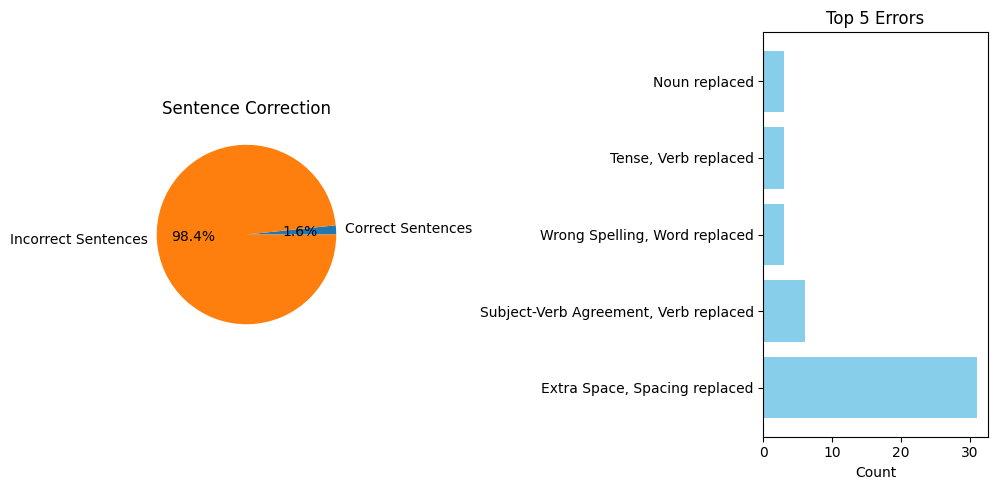

In [ ]:
import matplotlib.pyplot as plt

# Extract data from stats
total_sentences, correct_sentences, top_5_errors = stats[0], stats[1], stats[2:]

# Prepare data for pie chart
labels = ['Correct Sentences', 'Incorrect Sentences']
sizes = [correct_sentences, total_sentences - correct_sentences]

# Plot pie chart
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Sentence Correction')

# Prepare data for bar graph
error_names = [error[0] for error in top_5_errors]
error_counts = [error[1] for error in top_5_errors]

# Plot bar graph
plt.subplot(1, 2, 2)
plt.barh(error_names, error_counts, color='skyblue')
plt.xlabel('Count')
plt.title('Top 5 Errors')

# Show plots
plt.tight_layout()
plt.show()


In [ ]:
# real essay test

In [ ]:
Molly=["Good morning Principal, teachers and follow students, On behalf of the students' Union, I'd like to welcome all of you to ourschool.", "I'm sure we all want to achieve success and have enjoyable school life, so this morning I'd like to give you save achice.", 'First tip as a senior, I hope you all could put school rules at the first place in coming six years.', 'As the saying goes, when in Rome, do as to Romen do When you are in school - a place to learn, you should follow the school rules.', 'You may argue that school rules arerestricting your freedom or discolouring many excitements that could have happened in school.', 'To be honest, I had the same thought when Iwas your age.', 'It is, however, not exactly how it seems to be.', 'In fact, following school rules boost your development in self-desciplive.', 'Known bymost of us, once we are graduate, we are legally an adult who has to be responsible for our own actions, as rights always cove with obligations.', 'Just like spider Man once said" great power, comes with great responsibilities! All I want you to figure out is that school is a prototype ofsociety.', 'What you are doing now can reflect what you would be in society in the future.', 'Therefore, school vules is a chance for you to trainyour self-discipline and develop self-constrains instead of a wears that restrict your freedom.', "If you are not able to obeyschool rules now, you're not gonna able to behave yourself well and obey the law in the future.", 'So what? You may ask.', "Please bear in mind that if we do not obey the law, what's coming to you are no loyer a warning letter or detention, but being fired or worse, sent to jail.", "To illustrate, counterfeiting parent's signature is a serious out ofviolating the school rules while in society , it is a felony with seriousconsequences.", "I know you just don't want your parents to know that you failed your exam or it's just pretty convenient .", 'Let , do you think 10 years later when you counter feited a signature in a legal contract, the judge wald accept you explanation? Just for convenient"? I can see you all shaky your heads- Macfore.', 'it is crystal clear that following school rules develops your habbits and mindsets of staying dicsiplived which is a crucial element required to be a grown-up adult in modern society.', 'I believe that all of you are clever enough to understand this concept and find out how important to comply with school mes.', 'Beforeunverilin the second tip , let me tell you a story about a boy name Chris.', 'When her first entered the school in form 1, he was totally an introvert .', 'He was completely a quiet werd who rather stayed with books instead of : classmates.', 'The concept of wiseman do not need companion had rooted deeply in his mind.', 'Then , he had been through a verylonely andboring term.', "He didn't talk to anyone, not until a charming classmates came up to him and asked him about some dondemic questions.", 'Once and forever, he found outthe joy in having a friend.', 'He also realised thathaving a good friend would not pull you back from studying but in fact helping out each other and even-making further improvement on this academic results.', 'After that he finally know the importance of interpersonal relationship .', 'The boy from this story is in now actually standing in front of all of you, delivery this specie to you all.', 'I always regret on building up walls between my, classmatesand being bounded in my comfort zone .', "I always hope to know my dearest friends earlier! Yet, you are different from me, you are standing on, a giant's shoulders and I'm not gonna let you go astry like we! Developing interpersonalrelationship is fundamentally crucial! A companion does notOnly can be a study partner with you and accompany with you in this six year of learning but also provide mutual suppor when you are sad for constructive criticism to share you into a better person! so don't be a dummy like me, walk out of your confort zone and go know you classmates were! I believeCall of you here would love to meet new friends!"]

In [ ]:
input_essay=Molly

In [ ]:
def get_error_descriptions(error_string, operation_descriptions_table, error_descriptions_table):
    error_codes = error_string.split()
    error_desc = []
    sorted_keys = sorted(error_descriptions_table.keys(), key=lambda x: len(x), reverse=True)
    for code in error_codes:
        operation, *parts = code.split(':')
        max_match = ''
        for c in sorted_keys:
            if ':'.join(parts).startswith(c) and len(c) > len(max_match):
                max_match = c
        if max_match:
            value1, value2 = error_descriptions_table[max_match]
            if value2 is None:
                description = value1 + ' ' + operation_descriptions_table[operation]
            else:
                description = value2 + ', '+ value1 + ' ' + operation_descriptions_table[operation]
            error_desc.append(description)
    return ' '.join(error_desc)  # Return the English description instead of the error code

In [ ]:
from collections import Counter

def get_corrected_list(input_essay):
    # create empty lists to store results
    input_list = []
    highlight_list = []
    correction_list = []
    error_desc_list = []

    # For Json output
    json_output_list=[]

    # For Excel output
    excel_output_row_list = []

    # For error statistics
    total_sentences = 0
    correct_sentences = 0
    error_counter = Counter()

    ### Loop over sentence list with Gramformer
    for influent_sentence in input_essay:
        # get corrected sentences
        if(len(influent_sentence)>0):
            total_sentences += 1

            # Tokenize and prepare input
            tokenized_sentence = tokenizer('gec: ' + influent_sentence, max_length=150, truncation=True, padding='max_length', return_tensors='pt')

            # Generate corrected sentence
            generated_output = model.generate(
                input_ids=tokenized_sentence.input_ids,
                attention_mask=tokenized_sentence.attention_mask,
                max_length=150,
                num_beams=5,
                early_stopping=True,
            )

            # Decode and clean up the generated output
            corrected_sentence = tokenizer.decode(
                generated_output[0],
                skip_special_tokens=True,
                clean_up_tokenization_spaces=True
            )

            orig = annotator.parse(influent_sentence)
            cor = annotator.parse(corrected_sentence)
            edits = annotator.annotate(orig, cor)

            if not edits:  # If the list of edits is empty, the sentence is correct
                print("Sentence is correct")
                correct_sentences += 1
            else:
                for e in edits:
                    error_desc = get_error_descriptions(e.type, operation_descriptions_table, error_descriptions_table)
                    print(e.o_start, e.o_end, e.o_str, e.c_start, e.c_end, e.c_str, e.type, error_desc)
                    error_counter[error_desc] += 1  # Update the error counter with the English description
                    break  # Break after the first edit

            print("-" * 100)

            # append results to lists
            input_list.append(influent_sentence)
#            highlight_list.append(highlights)
            correction_list.append(corrected_sentence)
            error_desc_list.append(error_desc)

            # Collect row data for each sentence
            temple_sentence_list = [influent_sentence, corrected_sentence, error_desc]
            excel_output_row_list.append(temple_sentence_list)

            outputObject = {
                "original_input": influent_sentence,
                "correction": corrected_sentence,
                "error_description": error_desc,
            }
            json_output_list.append(outputObject)

    # Get top 5 errors
    top_5_errors = error_counter.most_common(5)

    # Save statistics
    stats = [total_sentences, correct_sentences] + top_5_errors

    return  excel_output_row_list, json_output_list, stats

# Call the function and get the output
output, json_output, stats = get_corrected_list(input_essay)

# Write the output to a CSV file
with open('output.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(output)

# Write the output to a JSON file
with open('output.json', 'w') as json_file:
    json.dump(json_output, json_file)

# Print statistics
print(f"Total sentences: {stats[0]}")
print(f"Correct sentences: {stats[1]}")
print("Top 5 errors:")
for error_desc, count in stats[2:]:
    print(f"{error_desc}: {count}")

6 7 students, 6 7 students. R:OTHER Other replaced
----------------------------------------------------------------------------------------------------
10 10  10 11 an M:DET Determiner missing
----------------------------------------------------------------------------------------------------
9 10 could 9 10 can R:VERB:TENSE Tense, Verb replaced
----------------------------------------------------------------------------------------------------
16 19 school - a 16 17 school-a R:ORTH Extra Space, Spacing replaced
----------------------------------------------------------------------------------------------------
6 7 arerestricting 6 7 restrict R:SPELL Wrong Spelling, Word replaced
----------------------------------------------------------------------------------------------------
9 10 Iwas 9 11 I was R:ORTH Extra Space, Spacing replaced
----------------------------------------------------------------------------------------------------
Sentence is correct
-------------------------------

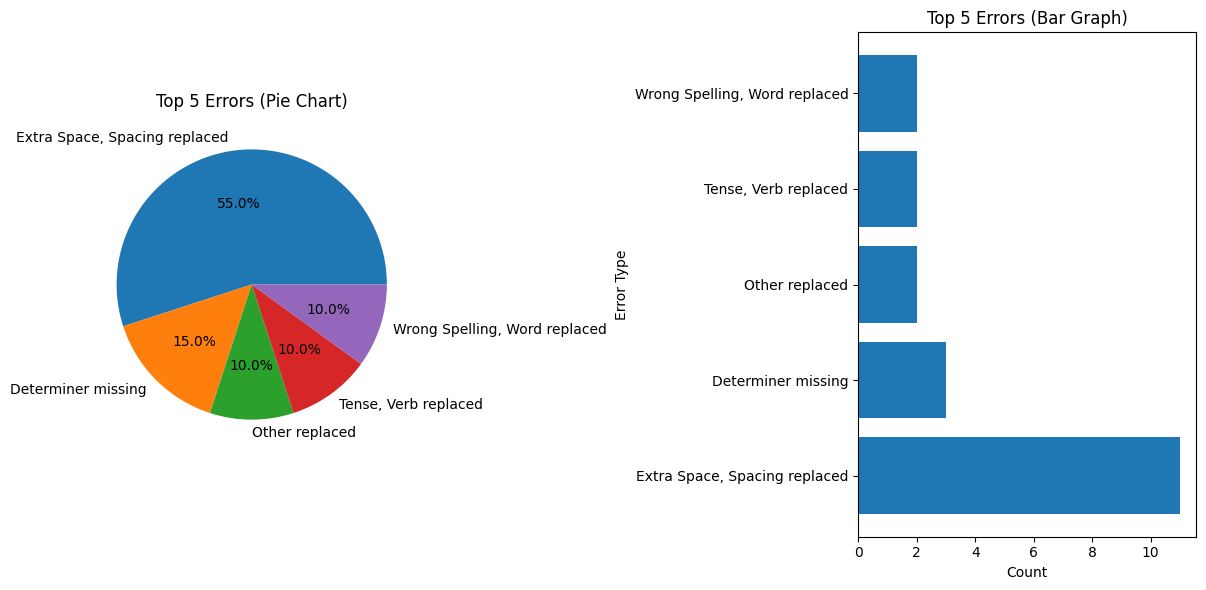

In [ ]:
import matplotlib.pyplot as plt

# Extract error names and counts from stats
error_names = [error for error, _ in stats[2:]]
error_counts = [count for _, count in stats[2:]]

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot pie chart
ax1.pie(error_counts, labels=error_names, autopct='%1.1f%%')
ax1.set_title('Top 5 Errors (Pie Chart)')

# Plot horizontal bar graph
ax2.barh(error_names, error_counts)
ax2.set_title('Top 5 Errors (Bar Graph)')
ax2.set_ylabel('Error Type')
ax2.set_xlabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()
